In [1]:
import numpy as np

# 一个完整的流程

## Loading the MNIST dataset in Keras

In [9]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## The network architecture

In [11]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

## The compilation step

In [12]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Preparing the image data

In [15]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## Preparing the labels

In [16]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Training the network

In [18]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.2559 - acc: 0.9259
Epoch 2/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.1047 - acc: 0.9688
Epoch 3/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.0692 - acc: 0.9790
Epoch 4/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.0506 - acc: 0.9845
Epoch 5/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.0381 - acc: 0.9888


## Evaluating the network

In [20]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 28us/step
test_acc: 0.9805


# Data representations for neural networks 神经网络的数据表示 - tensors
- 定义
- tensor: a container for numbers
- axes: 轴，即维度
- rank: 一个tensor轴的个数 例如3D tensor有3个轴，2D tensor即矩阵，有2个轴；在numpy中，又叫tensor's ndim
- shape：一个由数字组成的元组（tuple），它用来表示某个tensor沿着每一个轴有多少维 例如：
-  矩阵:(3,5) 3D tensor: (3,3,5) 5维向量：（5，） 标量：scalar
- 数据类型： 通常为float32（32位浮点型）  float64(64位浮点型） uint8(8位整型） 极少出现char

In [ ]:
## 标量（scalars，0D tensors）
- 只包含一个数字

## Scalars (0D tensors)
x = np.array(12)
x.ndim

## 向量（vectors, 1D tensors）
- 数值型数组称为一个向量 或 1维tensor
- 5D vector: 拥有5个元素的array，与5D tensor不同
- 5D vector只有一个axis，沿着这个轴有5个维度，而5D tensor有5个axes，每个轴可以有任意维
- Dimensionality" can either denote the number of entries
along a specific axis 

In [25]:
x = np.array([1,2,3,4])
x.ndim

1

## matrices 矩阵 （2D tensors）

In [5]:
x = np.array([[5, 78, 2, 34, 0], [6, 79, 3, 35, 1], [7, 80, 4, 36, 2]])
x.ndim

2

## 3D tensors 及更高维度的tensors
- 3D tensors: 将多个矩阵放到一个数组里
- 4D tensors: 将多个3Dtensors放到一个数组里 将得到4D tensors
- ...
- 深度学习通常为0D-4D的tensors，如果处理视频数据 可能会达到5D

In [7]:
x = np.array([[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]]])
x.ndim

3

##  train_images的属性

In [15]:
print("the number of axes of the tensor : ", train_images.ndim) 
print("the shape of the tensor : ", train_images.shape) # 60000个28*28的整型矩阵
print("the datatype of the tensor : ", train_images.dtype)

the number of axes of the tensor :  3
the shape of the tensor :  (60000, 28, 28)
the datatype of the tensor :  uint8


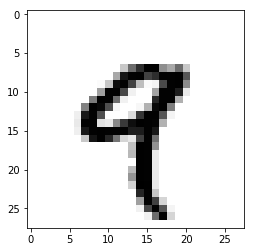

In [23]:
some_digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(some_digit, cmap=plt.cm.binary)
plt.show()

## 批量数据（data batch）的概念
- 通常 在所有的tensors数据中第一个轴被称为样本轴（sample axis）在MNIST数据总，样本是数字图片的个数
- 除此之外 深度学习模型并不一次性处理整个数据 而是将它们拆分成不同的批次（batch）
- 在考虑batch tensor时，第一个轴称为batch axis

In [28]:
batch = train_images[:128]
# and here's the next batch
batch = train_images[128:256]

## Real-world examples of data tensors 真实tensors数据举例

In [ ]:
# 2D tensors （samples，features）
# 3D tensors 时间序列数据或者次序数据 （samples，timesteps, features）
# 4D tensors 图片数据 （samples, width, height, channels）
# 5D tensors 视频数据 （samples, frames, width, height, channels）

In [30]:
def naive_add_matrix_and_vector(x, y):
    # x is a 2D Numpy tensor
    # y is a Numpy vector
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy() # Avoid overwriting the input tensor
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [35]:
x=np.array([[1,2,3], [4,5,6], [7,8,9]])
y = np.array([1,1,1])

In [39]:
x + y

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])

In [40]:
naive_add_matrix_and_vector(x,y)

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])

In [41]:
x*y

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [42]:
np.dot(x,y)

array([ 6, 15, 24])